# **Medical Insurance Cost Prediction**
---
### **Project Overview**
This project aims to predict medical insurance costs based on key demographic and lifestyle factors such as age, gender, BMI, smoking habits, number of children, and geographic location. The dataset is analyzed, processed, and modeled using Machine Learning algorithms.

## **1. Data Wrangling**
---
### **Steps Performed**:
1. Load the dataset.
2. Check for missing values and duplicates.
3. Identify and handle outliers.
4. Encode categorical features for modeling.
5. Generate basic summary statistics.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("insurance.csv")

# Display first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Basic Information about Dataset
print("Dataset Information:\n")
df.info()

# Check for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check for Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Rows: 1

Summary Statistics:

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.

In [4]:
# Encoding Categorical Variables
encoded_df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display Encoded DataFrame
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [5]:
# Detecting Outliers using IQR
Q1 = df[['age', 'bmi', 'charges']].quantile(0.25)
Q3 = df[['age', 'bmi', 'charges']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['age', 'bmi', 'charges']] < (Q1 - 1.5 * IQR)) | (df[['age', 'bmi', 'charges']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers in Numeric Features:\n", outliers)

Outliers in Numeric Features:
 age          0
bmi          9
charges    139
dtype: int64


## **2. Exploratory Data Analysis (EDA)**
---
### Goals:
1. Visualize feature distributions.
2. Analyze relationships between features and `charges` (target variable).
3. Check feature correlations.
4. Identify patterns in smokers vs non-smokers.

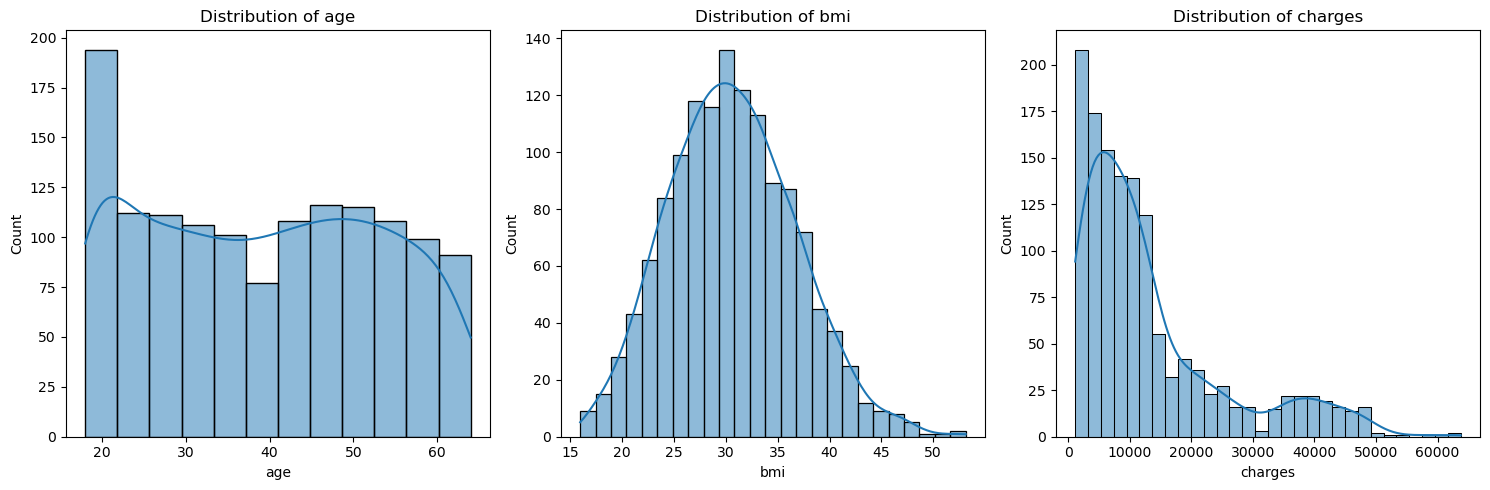

In [6]:
# Plotting Distributions of Numeric Features
numeric_features = ['age', 'bmi', 'charges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

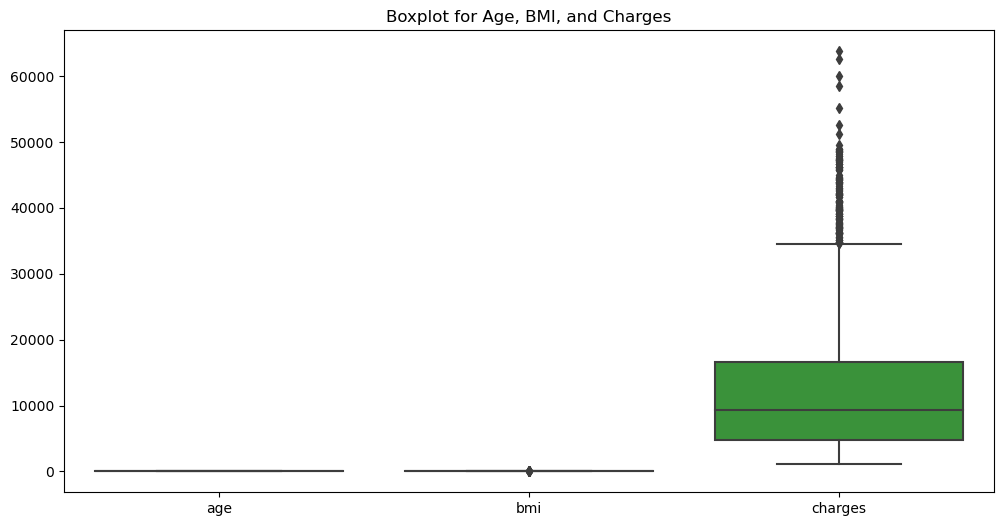

In [7]:
# Boxplot to Analyze Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title('Boxplot for Age, BMI, and Charges')
plt.show()

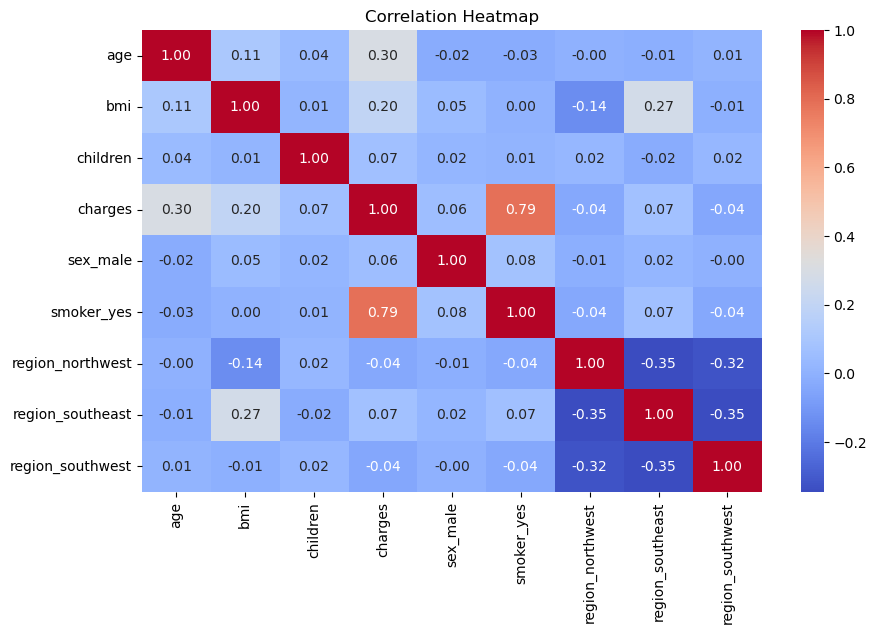

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = encoded_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

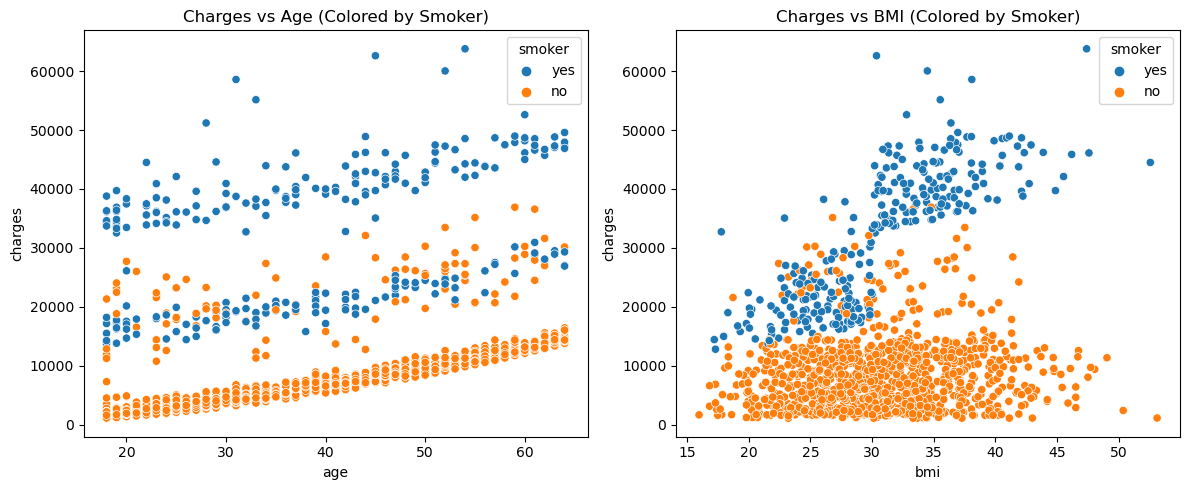

In [9]:
# Scatter Plot: Charges vs Age, BMI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age (Colored by Smoker)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI (Colored by Smoker)')
plt.tight_layout()
plt.show()